In [79]:
# Bagged Decision Trees for Classification
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import KFold, cross_val_score, RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import preprocessing

In [52]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check (1).csv to Fraud_check (1).csv


In [55]:
data=pd.read_csv('Fraud_check (1).csv')

In [56]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# **EDA**

In [57]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [58]:
data.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [59]:
data[data.duplicated()] #no duplicate values

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [61]:
data.info() #600 rows, 6 columns and no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [62]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [63]:
data.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [67]:
numerical_features = data.describe(include=["int64"]).columns
numerical_features

Index(['Taxable.Income', 'City.Population', 'Work.Experience'], dtype='object')

In [66]:
categorical_features = data.describe(include=["object"]).columns
categorical_features

Index(['Undergrad', 'Marital.Status', 'Urban'], dtype='object')

# **Visualization**

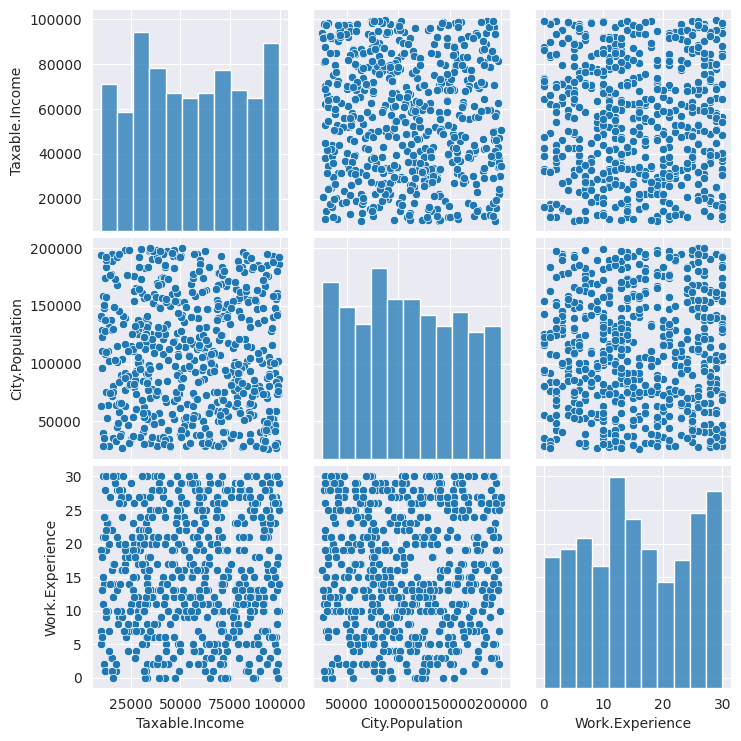

In [65]:
sns.set_style(style = 'darkgrid')
sns.pairplot(data) #none of the features is normally distributed

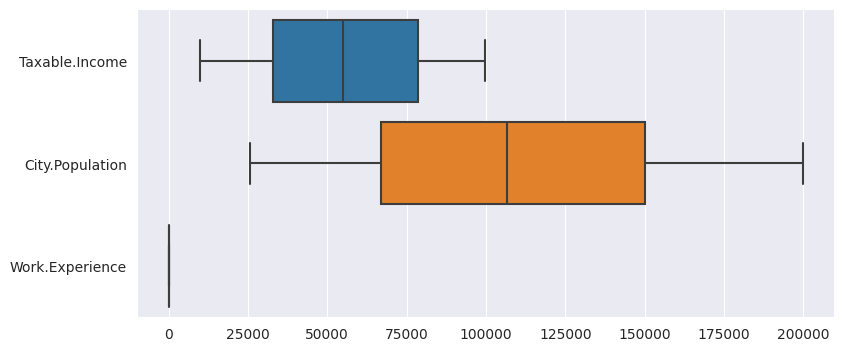

In [68]:
plt.figure(figsize=(9,4))
sns.boxplot(data= data[numerical_features], orient="h")
plt.show() #Work Experience has a mean that is much inferior to the other constituents

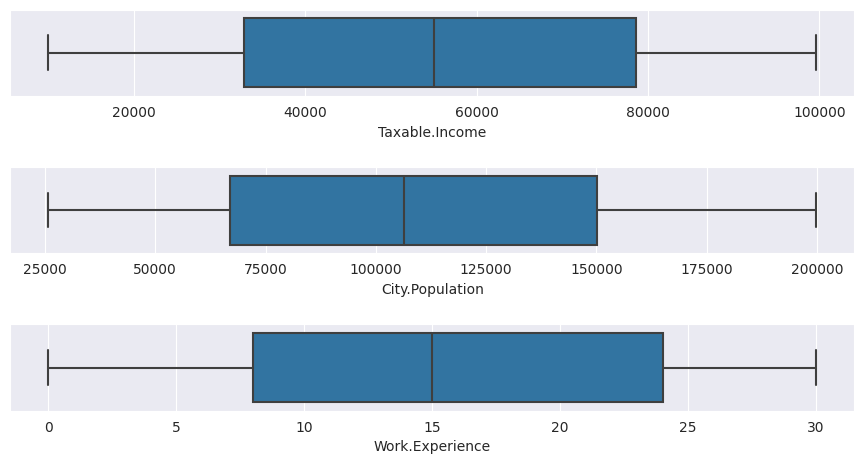

In [69]:
outlier = data.copy()
fig, axes = plt.subplots(3,1,figsize=(9,5))
sns.boxplot(x='Taxable.Income',data= outlier,ax=axes[0])
sns.boxplot(x='City.Population',data= outlier,ax=axes[1])
sns.boxplot(x='Work.Experience',data= outlier,ax=axes[2])
plt.tight_layout(pad=2.0)

Index(['Undergrad', 'Marital.Status', 'Urban'], dtype='object')


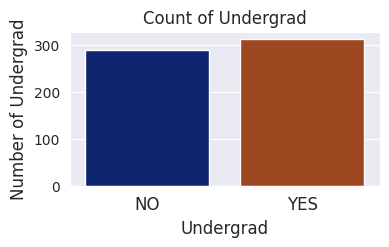

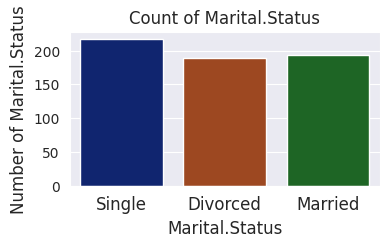

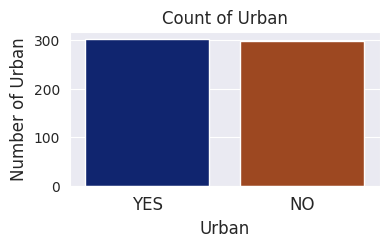

In [70]:
print(categorical_features)

for idx, column in enumerate(categorical_features):
    plt.figure(figsize=(4,2))
    unique = data[column].value_counts(ascending=True);

    plt.title("Count of "+ column)
    sns.countplot(data= data, x=column,palette = "dark")
    plt.xticks(rotation = 0, size = 12)

    plt.xlabel(column, fontsize=12)
    plt.ylabel("Number of "+ column, fontsize=12)

# **Feature Engineering**

In [76]:
#Categorial Data Based on Taxable income
tax_value=[]
for i in data['Taxable.Income']:
  if i<=30000:
    tax_value.append("risky")
  else:
    tax_value.append("Good")
data['Tax_value']=tax_value

In [77]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax_value
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    int64 
 1   Marital.Status   600 non-null    int64 
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    int64 
 6   Tax_value        600 non-null    object
dtypes: int64(6), object(1)
memory usage: 32.9+ KB


In [80]:
#categorical data is converted into numerical
label = preprocessing.LabelEncoder()
data['Undergrad'] = label.fit_transform(data['Undergrad'])
data['Marital.Status'] = label.fit_transform(data['Marital.Status'])
data['Urban'] = label.fit_transform(data['Urban'])

In [81]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax_value
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good


In [82]:
data['Undergrad'].value_counts() #No=0, Yes=1

1    312
0    288
Name: Undergrad, dtype: int64

In [74]:
data['Marital.Status'].value_counts() #Divorced=0, Married=1, Single=2

2    217
1    194
0    189
Name: Marital.Status, dtype: int64

In [75]:
data['Urban'].value_counts() #No=0, Yes=1

1    302
0    298
Name: Urban, dtype: int64

In [83]:
data1 = data.drop(['Taxable.Income'], axis=1)

In [84]:
data1.sample(5)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Tax_value
233,0,1,63701,19,1,risky
559,1,0,180424,26,0,Good
285,0,2,63420,10,0,Good
176,0,1,75169,28,0,Good
493,0,1,103226,29,0,risky


In [85]:
#defining independent and dependent varibales
x = data1.iloc[:, 0:5] #independet variable
y = data1['Tax_value'] #dependent variable

In [86]:
data1.Tax_value.value_counts()

Good     476
risky    124
Name: Tax_value, dtype: int64

In [87]:
#splitting data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0) #20% data will go to test

In [88]:
print('Shape of x_train: ', x_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (480, 5)
Shape of x_test:  (120, 5)
Shape of y_train:  (480,)
Shape of y_test:  (120,)


# **Bagging**

# **Randomized Search CV**

In [89]:
classifier = BaggingClassifier()
param_grid=[{'n_estimators':[100, 200, 150],'random_state':[7, 10, 9]}]
#n_estimators=number of trees
gsv=RandomizedSearchCV(classifier,param_grid, cv=10, verbose=300) #verbose controls output
#cv=10 means 10 folds
gsv.fit(x_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV 1/10; 1/9] START n_estimators=100, random_state=7...........................
[CV 1/10; 1/9] END n_estimators=100, random_state=7;, score=0.729 total time=   0.4s
[CV 2/10; 1/9] START n_estimators=100, random_state=7...........................
[CV 2/10; 1/9] END n_estimators=100, random_state=7;, score=0.792 total time=   0.3s
[CV 3/10; 1/9] START n_estimators=100, random_state=7...........................
[CV 3/10; 1/9] END n_estimators=100, random_state=7;, score=0.708 total time=   0.3s
[CV 4/10; 1/9] START n_estimators=100, random_state=7...........................
[CV 4/10; 1/9] END n_estimators=100, random_state=7;, score=0.750 total time=   0.3s
[CV 5/10; 1/9] START n_estimators=100, random_state=7...........................
[CV 5/10; 1/9] END n_estimators=100, random_state=7;, score=0.812 total time=   0.3s
[CV 6/10; 1/9] START n_estimators=100, random_state=7...........................
[CV 6/10; 1/9] END n_estimat

RandomizedSearchCV(cv=10, estimator=BaggingClassifier(),
                   param_distributions=[{'n_estimators': [100, 200, 150],
                                         'random_state': [7, 10, 9]}],
                   verbose=300)

In [90]:
gsv.best_params_, gsv.best_score_

({'random_state': 7, 'n_estimators': 200}, 0.7437500000000001)

In [91]:
# Bagged Decision Trees for Classification
kfold = KFold(n_splits=10, random_state=7, shuffle=True) # evaluation method
cart = DecisionTreeClassifier()

model = BaggingClassifier(base_estimator=cart, n_estimators=200, random_state=7) #Classifier
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean()*100)

74.33333333333333


# **Random Forest**

# **Randomized Search CV**

In [92]:
classifier = RandomForestClassifier()
param_grid=[{'n_estimators':[100, 200, 150],'random_state':[7, 10, 9], 'max_features':[3]}]
#n_estimators=number of trees, #max_features=number of features
gsv=RandomizedSearchCV(classifier,param_grid, cv=10, verbose=300) #verbose controls output
#cv=10 means 10 folds
gsv.fit(x_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV 1/10; 1/9] START max_features=3, n_estimators=100, random_state=7...........
[CV 1/10; 1/9] END max_features=3, n_estimators=100, random_state=7;, score=0.750 total time=   0.2s
[CV 2/10; 1/9] START max_features=3, n_estimators=100, random_state=7...........
[CV 2/10; 1/9] END max_features=3, n_estimators=100, random_state=7;, score=0.792 total time=   0.2s
[CV 3/10; 1/9] START max_features=3, n_estimators=100, random_state=7...........
[CV 3/10; 1/9] END max_features=3, n_estimators=100, random_state=7;, score=0.729 total time=   0.2s
[CV 4/10; 1/9] START max_features=3, n_estimators=100, random_state=7...........
[CV 4/10; 1/9] END max_features=3, n_estimators=100, random_state=7;, score=0.750 total time=   0.2s
[CV 5/10; 1/9] START max_features=3, n_estimators=100, random_state=7...........
[CV 5/10; 1/9] END max_features=3, n_estimators=100, random_state=7;, score=0.792 total time=   0.2s
[CV 6/10; 1/9] START max_feat

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions=[{'max_features': [3],
                                         'n_estimators': [100, 200, 150],
                                         'random_state': [7, 10, 9]}],
                   verbose=300)

In [93]:
gsv.best_params_, gsv.best_score_

({'random_state': 7, 'n_estimators': 100, 'max_features': 3},
 0.7479166666666667)

In [94]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

model = RandomForestClassifier(n_estimators=100, max_features=3)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean()*100)

74.33333333333333


# **AdaBoost**

# **Randomized Search CV**

In [95]:
classifier = AdaBoostClassifier()
param_grid=[{'n_estimators':[100, 200, 150],'random_state':[7, 10, 9]}]
#n_estimators=number of trees
gsv=RandomizedSearchCV(classifier,param_grid, cv=10, verbose=300) #verbose controls output
#cv=10 means 10 folds
gsv.fit(x_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV 1/10; 1/9] START n_estimators=100, random_state=7...........................
[CV 1/10; 1/9] END n_estimators=100, random_state=7;, score=0.771 total time=   0.2s
[CV 2/10; 1/9] START n_estimators=100, random_state=7...........................
[CV 2/10; 1/9] END n_estimators=100, random_state=7;, score=0.750 total time=   0.2s
[CV 3/10; 1/9] START n_estimators=100, random_state=7...........................
[CV 3/10; 1/9] END n_estimators=100, random_state=7;, score=0.812 total time=   0.2s
[CV 4/10; 1/9] START n_estimators=100, random_state=7...........................
[CV 4/10; 1/9] END n_estimators=100, random_state=7;, score=0.792 total time=   0.2s
[CV 5/10; 1/9] START n_estimators=100, random_state=7...........................
[CV 5/10; 1/9] END n_estimators=100, random_state=7;, score=0.792 total time=   0.2s
[CV 6/10; 1/9] START n_estimators=100, random_state=7...........................
[CV 6/10; 1/9] END n_estimat

RandomizedSearchCV(cv=10, estimator=AdaBoostClassifier(),
                   param_distributions=[{'n_estimators': [100, 200, 150],
                                         'random_state': [7, 10, 9]}],
                   verbose=300)

In [96]:
gsv.best_params_, gsv.best_score_

({'random_state': 7, 'n_estimators': 100}, 0.7729166666666667)

In [97]:
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
model = AdaBoostClassifier(n_estimators=100, random_state=7)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean()*100)

77.66666666666666


# **Stacking**

In [98]:
kfold = KFold(n_splits=10, random_state=10,shuffle=True)

# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, x, y, cv=kfold)
print(results.mean()*100)

79.33333333333333


**Conclusion:** Stacking technique has maximum accuracy 79.33%